# Análise da Loja do Google Play

Este notebook tem como objetivo analisar os dados da loja do Google Play e gerar gráficos para visualização dos dados.

## Etapa 1: Preparação do Ambiente

Certifique-se de que as bibliotecas Pandas e Matplotlib estão instaladas.


In [3]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

# Configuração para exibir gráficos no Jupyter Notebook
%matplotlib inline


## Etapa 2: Leitura e Limpeza dos Dados

Vamos ler o arquivo CSV e remover as linhas duplicadas.


In [4]:
# Leitura do arquivo CSV
df = pd.read_csv('C:\\Users\\User\\OneDrive\\Área de Trabalho\\trainee-repo-template\\Sprint 3\\Desafio\\googleplaystore.csv')

# Remover linhas duplicadas
df.drop_duplicates(inplace=True)

# Exibir as primeiras linhas do dataset para verificação
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Etapa 3: Gráfico de Barras dos Top 5 Apps por Número de Instalação

Vamos criar um gráfico de barras para os top 5 apps por número de instalação.


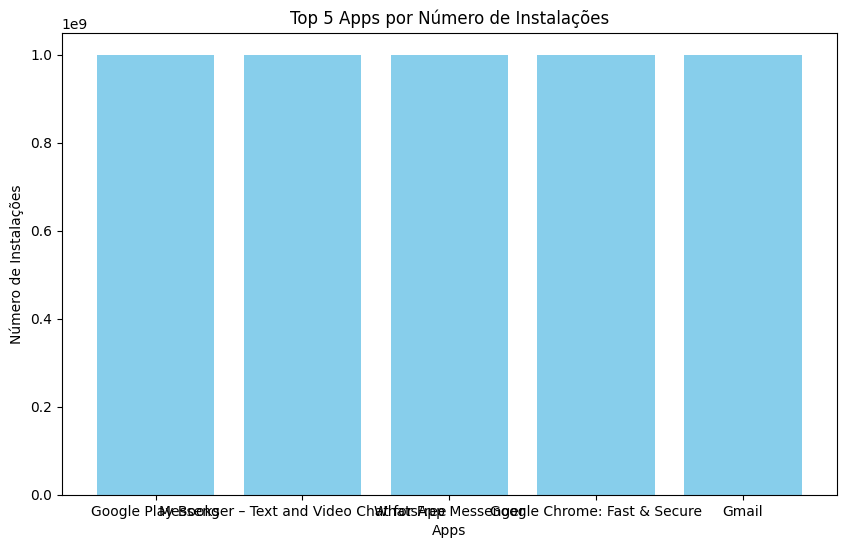

In [15]:
# Filtrar valores não numéricos e converter a coluna 'Installs' para um formato numérico
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '')
df = df[df['Installs'].str.isnumeric()]
df['Installs'] = df['Installs'].astype(int)

# Selecionar os top 5 apps por número de instalação
top_5_installs = df[['App', 'Installs']].nlargest(5, 'Installs')

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_5_installs['App'], top_5_installs['Installs'], color='skyblue')
plt.xlabel('Apps')
plt.ylabel('Número de Instalações')
plt.title('Top 5 Apps por Número de Instalações')
plt.show()


## Etapa 4: Gráfico de Pizza das Categorias de Apps

Vamos criar um gráfico de pizza mostrando a frequência das categorias de apps.


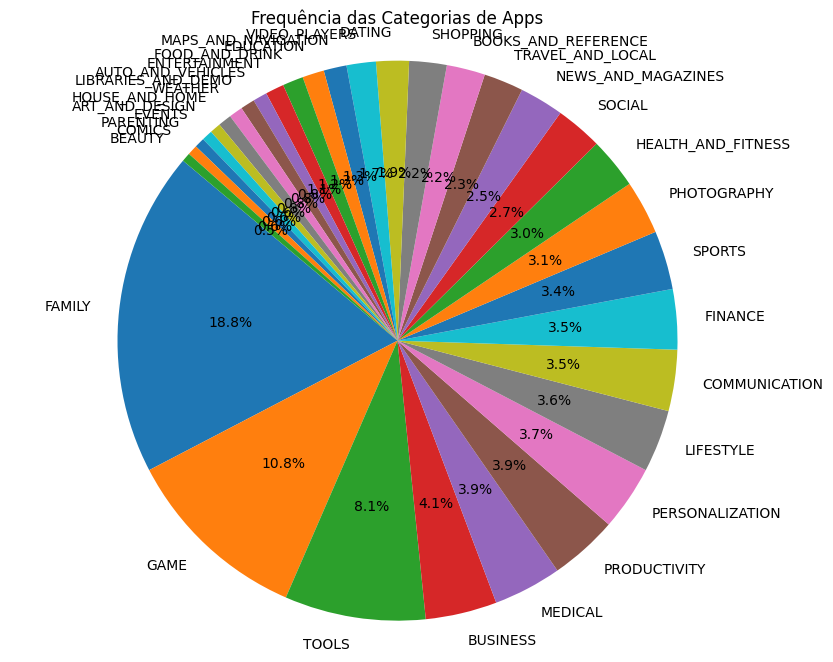

In [28]:
# Contar a frequência de cada categoria
category_counts = df['Category'].value_counts()

# Criar gráfico de pizza
plt.figure(figsize=(10, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Frequência das Categorias de Apps')
plt.show()



## Etapa 5: App Mais Caro

Vamos mostrar qual é o app mais caro existente no dataset.


In [17]:
# Converter a coluna 'Price' para um formato numérico
df['Price'] = df['Price'].str.replace('$', '').astype(float)

# Encontrar o app mais caro
most_expensive_app = df[['App', 'Price']].nlargest(1, 'Price')
most_expensive_app


,App,Price
4367,I'm Rich - Trump Edition,400.0


## Etapa 6: Apps Classificados como 'Mature 17+'

Vamos mostrar quantos apps são classificados como 'Mature 17+'.


In [19]:
# Contar o número de apps classificados como 'Mature 17+'
mature_apps_count = df[df['Content Rating'] == 'Mature 17+'].shape[0]
mature_apps_count


447

## Etapa 7: Top 10 Apps por Número de Reviews

Vamos mostrar o top 10 apps por número de reviews e o respectivo número de reviews.


In [20]:
# Converter a coluna 'Reviews' para um formato numérico
df['Reviews'] = df['Reviews'].astype(int)

# Selecionar os top 10 apps por número de reviews
top_10_reviews = df[['App', 'Reviews']].nlargest(10, 'Reviews')
top_10_reviews


,App,Reviews
2544,Facebook,78158306
3943,Facebook,78128208
336,WhatsApp Messenger,69119316
3904,WhatsApp Messenger,69109672
2604,Instagram,66577446
2545,Instagram,66577313
3909,Instagram,66509917
382,Messenger – Text and Video Chat for Free,56646578
335,Messenger – Text and Video Chat for Free,56642847
1879,Clash of Clans,44893888


## Etapa 8: Cálculos Adicionais e Novas Formas Gráficas

Vamos criar pelo menos mais 2 cálculos sobre o dataset e apresentar um em formato de lista e outro em formato de valor. Além disso, vamos criar outras 2 formas gráficas de exibição dos indicadores.


In [21]:
# Calculo adicional 1: Média de classificação dos apps
average_rating = df['Rating'].mean()
average_rating


4.187876743139902

In [22]:
# Calculo adicional 2: Número de apps por categoria
apps_per_category = df['Category'].value_counts()
apps_per_category


Category
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

8. vamos criar pelo menos outras 2 formas gráficas de exibição dos indicadores acima utilizando a biblioteca matplotlib.
Escolha tipos de gráficos diferentes dos explorados acima. Por exemplo: linhas e dispersão.

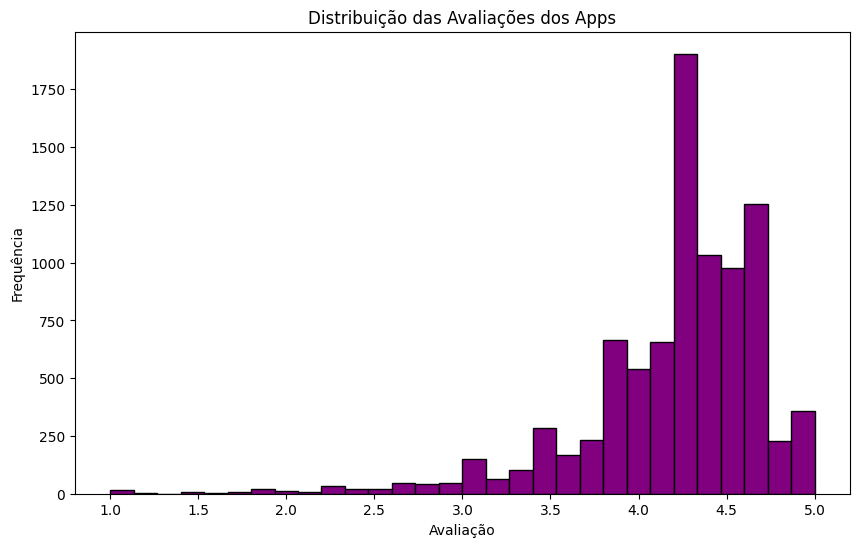

In [23]:
# Gráfico adicional 3: Histograma da distribuição das avaliações dos apps
plt.figure(figsize=(10, 6))
plt.hist(df['Rating'].dropna(), bins=30, color='purple', edgecolor='black')
plt.title('Distribuição das Avaliações dos Apps')
plt.xlabel('Avaliação')
plt.ylabel('Frequência')
plt.show()


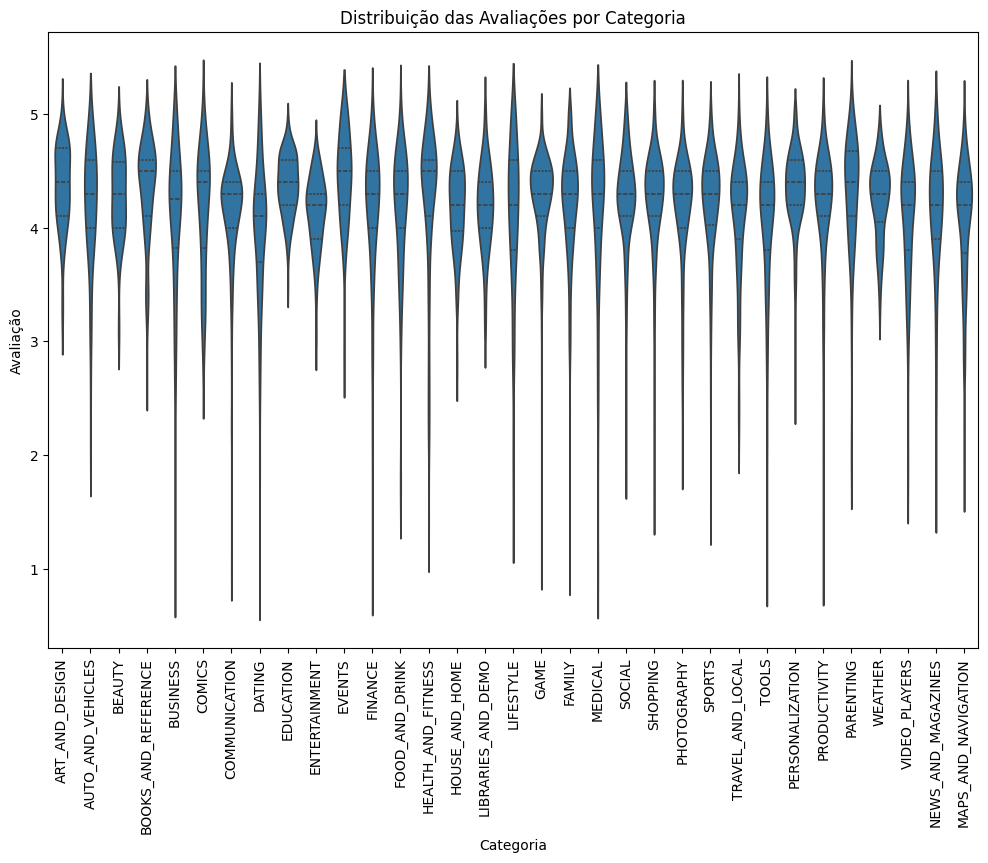

In [31]:
# Remover valores faltantes e não numéricos em 'Rating' e 'Category'
df_cleaned = df.dropna(subset=['Rating', 'Category'])

plt.figure(figsize=(12, 8))
sns.violinplot(x='Category', y='Rating', data=df_cleaned, inner='quartile')
plt.title('Distribuição das Avaliações por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Avaliação')
plt.xticks(rotation=90)
plt.show()
